In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret import classification

In [2]:
data = pd.read_csv('../feature_sets/post_champ_sel/raw_v0.csv')
data.head()

,league,season,year,week,patch,format,game_in_format,blue_team_outcome,season_format,month,...,champ_red_ban_0_id,champ_red_ban_1_id,champ_red_ban_2_id,champ_red_ban_3_id,champ_red_ban_4_id,champ_red_top_id,champ_red_jungle_id,champ_red_mid_id,champ_red_bot_id,champ_red_supp_id
0,3,0,2024,0,5,2,1,1,0,4,...,1,9,54.0,49.0,147.0,106,148,11,113,129
1,3,0,2024,0,5,2,2,0,0,4,...,72,129,142.0,2.0,130.0,103,81,11,113,95
2,3,0,2024,0,5,2,3,1,0,4,...,72,129,77.0,97.0,155.0,109,147,10,142,54
3,3,0,2024,0,5,2,4,1,0,4,...,1,9,49.0,155.0,81.0,38,147,130,54,101
4,3,0,2024,5,5,2,1,1,0,4,...,113,77,142.0,109.0,97.0,103,104,130,162,73


In [3]:
classification_setup = classification.setup(data= data, target='blue_team_outcome',use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

,Description,Value
0,Session id,6317
1,Target,blue_team_outcome
2,Target type,Binary
3,Original data shape,"(877, 43)"
4,Transformed data shape,"(877, 43)"
5,Transformed train set shape,"(613, 43)"
6,Transformed test set shape,"(264, 43)"
7,Numeric features,42
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

In [4]:
best = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5954,0.6065,0.6363,0.6180,0.6236,0.1860,0.1887,0.7690
xgboost,Extreme Gradient Boosting,0.5809,0.6145,0.6366,0.5973,0.6149,0.1562,0.1579,0.3070
catboost,CatBoost Classifier,0.5760,0.5988,0.6208,0.5963,0.6069,0.1468,0.1478,36.3830
ada,Ada Boost Classifier,0.5678,0.5762,0.6116,0.5914,0.5994,0.1302,0.1299,0.1210
gbc,Gradient Boosting Classifier,0.5677,0.5980,0.6269,0.5882,0.6047,0.1282,0.1299,0.2780
rf,Random Forest Classifier,0.5498,0.5965,0.6239,0.5668,0.5922,0.0913,0.0933,0.1720
knn,K Neighbors Classifier,0.5466,0.5228,0.5930,0.5698,0.5800,0.0875,0.0878,0.0400
et,Extra Trees Classifier,0.5465,0.5688,0.6086,0.5648,0.5830,0.0867,0.0883,0.1390
qda,Quadratic Discriminant Analysis,0.5432,0.5174,0.7625,0.5502,0.6328,0.0621,0.0740,0.0290
lda,Linear Discriminant Analysis,0.5320,0.5406,0.5965,0.5545,0.5680,0.0573,0.0596,0.0270


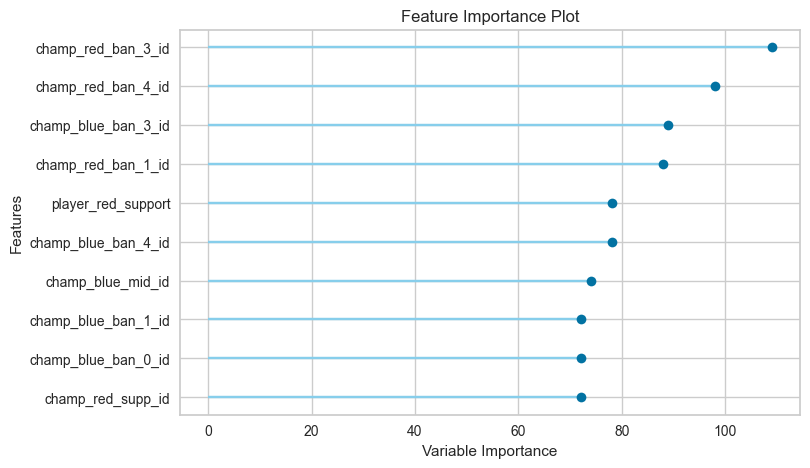

In [5]:
classification.plot_model(best, plot = 'feature')


In [6]:
classification.evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [7]:
holdout_pred = classification.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5606,0.6317,0.7050,0.5665,0.6282,0.1065,0.1103


In [8]:
tuned_model = classification.tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4032,0.3636,0.5455,0.4500,0.4932,-0.2163,-0.2223
1,0.6452,0.6301,0.6667,0.6667,0.6667,0.2874,0.2874
2,0.5323,0.6405,0.4848,0.5714,0.5246,0.0703,0.0712
3,0.6066,0.6185,0.6875,0.6111,0.6471,0.2061,0.2079
4,0.6230,0.5668,0.6562,0.6364,0.6462,0.2428,0.2430
5,0.5738,0.6250,0.6562,0.5833,0.6176,0.1399,0.1412
6,0.5902,0.6832,0.5938,0.6129,0.6032,0.1797,0.1798
7,0.6557,0.6800,0.6562,0.6774,0.6667,0.3109,0.3111
8,0.6885,0.7608,0.7500,0.6857,0.7164,0.3725,0.3743


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 291, number of negative: 260
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 551, number of used features: 40
[Li

In [9]:
classification.evaluate_model(tuned_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

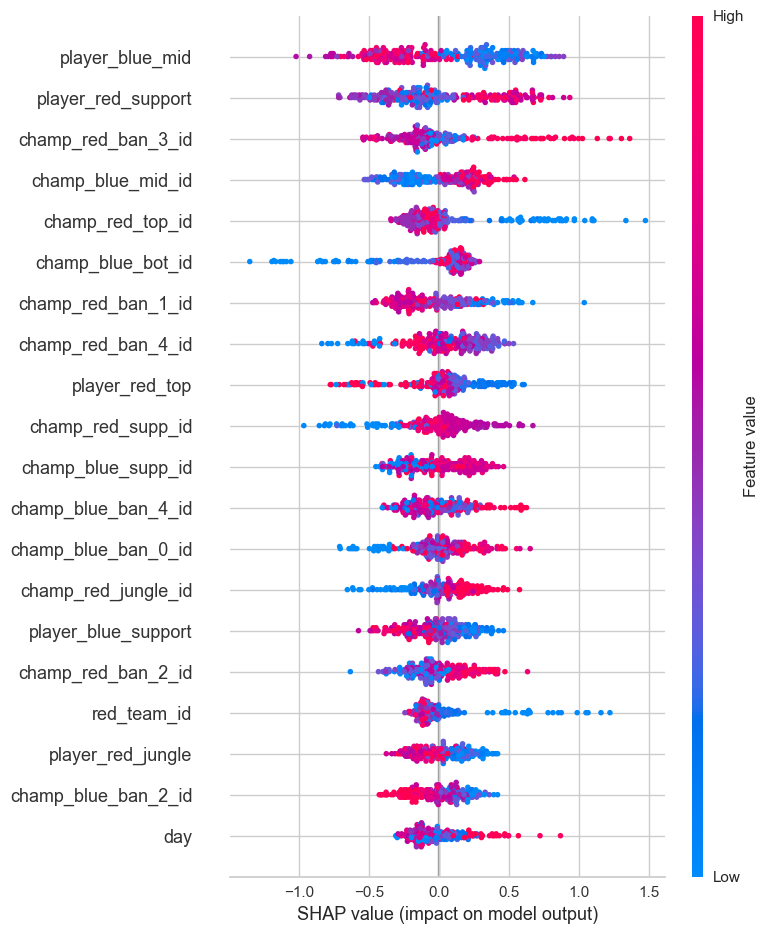

In [10]:
classification.interpret_model(tuned_model, plot = 'summary')